Template example

In [12]:
# !sudo apt-get -y install libmagickwand-dev

In [13]:
%pip install Wand

Note: you may need to restart the kernel to use updated packages.


Edit the file /etc/ImageMagick-6/policy.xml and changed the rights for the pdf line to "read|write":

<policy domain="coder" rights="read|write" pattern="PDF" />

In [14]:
from templates.models.template import Template
from templates.services.template_service import TemplateService

In [15]:
import os
os.getcwd()

'/home/az/workspace/templates-celery/notebooks'

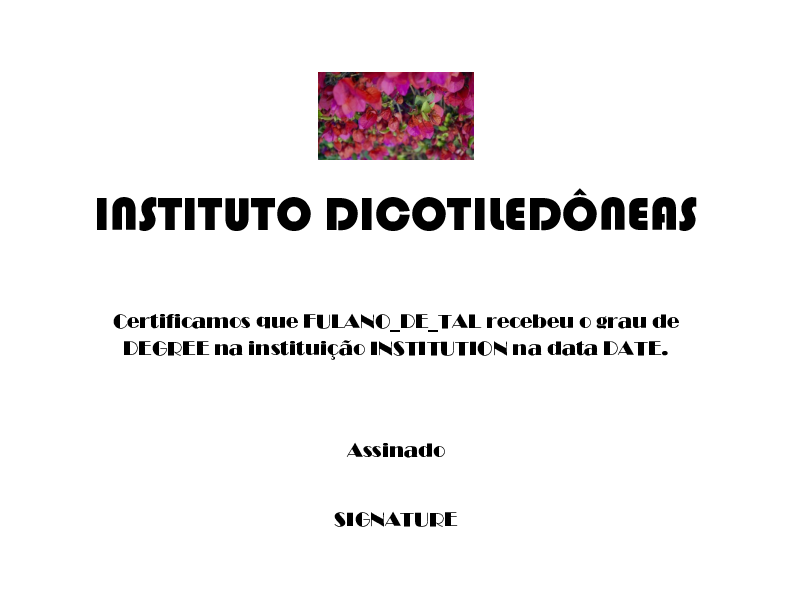

In [16]:
from wand.image import Image as WImage
from wand.color import Color
WImage(filename='../notebooks/example.pdf')

In [22]:
base64.b64encode(open('../notebooks/example.pdf', 'rb').read()).decode()

'JVBERi0xLjcNCiW1tbW1DQoxIDAgb2JqDQo8PC9UeXBlL0NhdGFsb2cvUGFnZXMgMiAwIFIvTGFuZyhlbikgL1N0cnVjdFRyZWVSb290IDI1IDAgUi9NYXJrSW5mbzw8L01hcmtlZCB0cnVlPj4vTWV0YWRhdGEgNzcgMCBSL1ZpZXdlclByZWZlcmVuY2VzIDc4IDAgUj4+DQplbmRvYmoNCjIgMCBvYmoNCjw8L1R5cGUvUGFnZXMvQ291bnQgMS9LaWRzWyAzIDAgUl0gPj4NCmVuZG9iag0KMyAwIG9iag0KPDwvVHlwZS9QYWdlL1BhcmVudCAyIDAgUi9SZXNvdXJjZXM8PC9Gb250PDwvRjEgNSAwIFIvRjIgOSAwIFIvRjMgMTQgMCBSL0Y0IDE2IDAgUi9GNSAyMSAwIFI+Pi9FeHRHU3RhdGU8PC9HUzcgNyAwIFIvR1M4IDggMCBSPj4vWE9iamVjdDw8L0ltYWdlMjMgMjMgMCBSPj4vUHJvY1NldFsvUERGL1RleHQvSW1hZ2VCL0ltYWdlQy9JbWFnZUldID4+L01lZGlhQm94WyAwIDAgNzkyIDYxMl0gL0NvbnRlbnRzIDQgMCBSL0dyb3VwPDwvVHlwZS9Hcm91cC9TL1RyYW5zcGFyZW5jeS9DUy9EZXZpY2VSR0I+Pi9UYWJzL1MvU3RydWN0UGFyZW50cyAwPj4NCmVuZG9iag0KNCAwIG9iag0KPDwvRmlsdGVyL0ZsYXRlRGVjb2RlL0xlbmd0aCA4MjU+Pg0Kc3RyZWFtDQp4nLWY32vbMBDH3w3+H+6xHUSRTneSDMHQJm3pWGFbO/Yw9lBGl6dm3Y//n50kZyVp7HiJWjCyLNX+3OnuvlJgevt0v4LZbHozv16Anr67Xy3h5GE1+XR72rZwvpjDz7rSSsufMUEjaPANgjMIvx7q6vMbWNXV+V1dTS8NyMO773VlZJIGA+RJaQ/ERpGMPMqkq1s

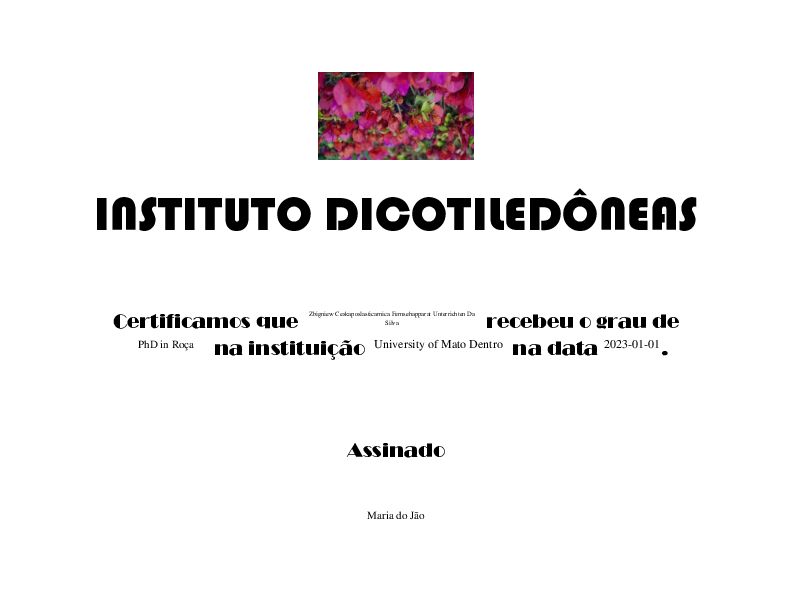

In [18]:
import base64
import tempfile

template_service = TemplateService()
template = Template(id = 1, name = "Example Template", pdf_file = base64.b64encode(open('../notebooks/example.pdf', 'rb').read()).decode())
template_service.replace_template_fields(template, 
        {
                "FULANO_DE_TAL": "Zbigniew Ceskaposlasticarnica Fernsehapparat Unterrichten Da Silva",
                "DEGREE": "PhD in Roça",
                "INSTITUTION": "University of Mato Dentro",
                "SIGNATURE": "Maria do Jão",
                "DATE": "2023-01-01"
        }
)
output_file = os.path.join(tempfile.gettempdir(), "output.pdf")
open(output_file, "wb").write(template.pdf_file)
WImage(filename=output_file)

In [19]:
template.model_dump_json()

'{"id":1,"name":"Example Template","pdf_file":"JVBERi0xLjcKJcK1wrYKCjEgMCBvYmoKPDwvVHlwZS9DYXRhbG9nL1BhZ2VzIDIgMCBSL0xhbmcoZW4pL1N0cnVjdFRyZWVSb290IDI1IDAgUi9NYXJrSW5mbzw8L01hcmtlZCB0cnVlPj4vTWV0YWRhdGEgNzcgMCBSL1ZpZXdlclByZWZlcmVuY2VzIDc4IDAgUj4+CmVuZG9iagoKMiAwIG9iago8PC9UeXBlL1BhZ2VzL0NvdW50IDEvS2lkc1szIDAgUl0+PgplbmRvYmoKCjMgMCBvYmoKPDwvVHlwZS9QYWdlL1BhcmVudCAyIDAgUi9SZXNvdXJjZXM8PC9Gb250PDwvRjEgNSAwIFIvRjIgOSAwIFIvRjMgMTQgMCBSL0Y0IDE2IDAgUi9GNSAyMSAwIFIvVGlSbyA5MSAwIFI+Pi9FeHRHU3RhdGU8PC9HUzcgNyAwIFIvR1M4IDggMCBSPj4vWE9iamVjdDw8L0ltMSAyMyAwIFI+Pj4+L01lZGlhQm94WzAgMCA3OTIgNjEyXS9Db250ZW50c1s5MiAwIFIgOTAgMCBSIDkzIDAgUiA5NCAwIFJdL0dyb3VwPDwvVHlwZS9Hcm91cC9TL1RyYW5zcGFyZW5jeS9DUy9EZXZpY2VSR0I+Pi9UYWJzL1MvU3RydWN0UGFyZW50cyAwL0Fubm90c1tdPj4KZW5kb2JqCgo0IDAgb2JqCjw8L0ZpbHRlci9GbGF0ZURlY29kZS9MZW5ndGggODI1Pj4Kc3RyZWFtCnictZjfa9swEMffDf4f7rEdRJFOd5IMwdAmbelYYVs79jD2UEaXp2bdj/+fnSRnJWnseIlaMLIs1f7c6e6+UmB6+3S/gtlsejO/XoCevrtfLeHkYTX5dHvatnC+mMPPutJKy58xQSNo8A2CMwi/Hurq8xtY1dX5XV1NLw3Iw7vvd

AttributeError: 'bytes' object has no attribute 'encode'

In [20]:
template.pdf_file


b'%PDF-1.7\n%\xc2\xb5\xc2\xb6\n\n1 0 obj\n<</Type/Catalog/Pages 2 0 R/Lang(en)/StructTreeRoot 25 0 R/MarkInfo<</Marked true>>/Metadata 77 0 R/ViewerPreferences 78 0 R>>\nendobj\n\n2 0 obj\n<</Type/Pages/Count 1/Kids[3 0 R]>>\nendobj\n\n3 0 obj\n<</Type/Page/Parent 2 0 R/Resources<</Font<</F1 5 0 R/F2 9 0 R/F3 14 0 R/F4 16 0 R/F5 21 0 R/TiRo 91 0 R>>/ExtGState<</GS7 7 0 R/GS8 8 0 R>>/XObject<</Im1 23 0 R>>>>/MediaBox[0 0 792 612]/Contents[92 0 R 90 0 R 93 0 R 94 0 R]/Group<</Type/Group/S/Transparency/CS/DeviceRGB>>/Tabs/S/StructParents 0/Annots[]>>\nendobj\n\n4 0 obj\n<</Filter/FlateDecode/Length 825>>\nstream\nx\x9c\xb5\x98\xdfk\xdb0\x10\xc7\xdf\r\xfe\x1f\xee\xb1\x1dD\x91Nw\x92\x0c\xc1\xd0&m\xe9Xa[;\xf60\xf6PF\x97\xa7f\xdd\x8f\xff\x9f\x9d$g%i\xecx\x89Z0\xb2,\xd5\xfe\xdc\xe9\xee\xbeR`z\xfbt\xbf\x82\xd9lz3\xbf^\x80\x9e\xbe\xbb_-\xe1\xe4a5\xf9t{\xda\xb6p\xbe\x98\xc3\xcf\xba\xd2J\xcb\x9f1A#h\xf0\r\x823\x08\xbf\x1e\xea\xea\xf3\x1bX\xd5\xd5\xf9]]M/\r\xc8\xc3\xbb\xefued\x92\x06\x03\xe4Ii\x0f\